# Persisting trained models and scalers

## 1. Abstract

The normal work of data analysts generally consists of analyzing them using statistical and machine learning techniques and their subsequent presentation in a report.<br>
This is different when the data model is to be used by an application at runtime. In these cases, training a model and using it to predict each instance is often very inefficient. It would be more convenient to train the model, store it, and have it available to be used later by the program or by the part of the program that needs it.<br>
Python pickles can be used for this: the model (and the scalers obtained after training) can be stored for later use in order to avoid training the same model for each prediction need.

In [15]:
import os
import random
import pickle
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
#
separador=os.sep

## 2. Basic use of Pickle

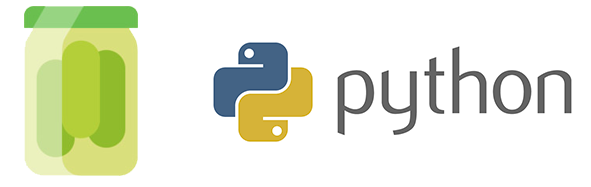

Image obtained from: https://www.programaenlinea.net/los-pickles-python/

Picke es una librería que permite serializar y des-serializar objetos. Dado un objeto el mismo puede almacenarse  en formato binario y en el futuro, puede recuperarse el objeto a partir del archivo binario almacenado. Para más información visitar: https://docs.python.org/3/library/pickle.html.

### 2.1. Saving a simple object

#### Object Creation;

In [16]:
# Definition or a class
class Car():
    def __init__(self, brand):
        self.brand = brand
# Creation of an instance of this class:
carOne=Car('Jeep')
print('Object:    ',carOne)
print('Attribute: brand=',carOne.brand)

Object:     <__main__.Car object at 0x7b6159827f50>
Attribute: brand= Jeep


#### Saving the object:

In [17]:
fileName='object.pkl'
pickle.dump(carOne, open(fileName, 'wb'))

#### Retrieving the object from file:

In [18]:
otherCar=pickle.load(open(fileName,'rb'))
print('Attribute loaded: brand=',otherCar.brand)
# Erase file after retrieving object
os.remove(fileName)

Attribute loaded: brand= Jeep


## 3. Pickling a model and a scaler

### 3.1. Training a model: Diabetes Prediction

#### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. The dataset can be downloaded from the site of Kaggle (link: <a href='https://www.kaggle.com/datasets/mathchi/diabetes-data-set'>'click here' </a>).

#### The dataset

In [19]:
# The Dataset from csv file
df = pd.read_csv('datasets'+str(separador)+'diabetes.csv')
fields=df.columns.tolist()
print(fields)
df

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,627.00,50,1
1,1,85,66,29,0,26.6,351.00,31,0
2,8,183,64,0,0,23.3,672.00,32,1
3,1,89,66,23,94,28.1,167.00,21,0
4,0,137,40,35,168,43.1,2288.00,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1


In [20]:
# Preparing the data
X_ = df.iloc[:,:len(fields)-1].values
y_=df.iloc[:,len(fields)-1]
y=np.array(y_)
# Scaling data
sc = StandardScaler()
X = sc.fit_transform(X_)
# Split in Train and Test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

#### Training a Model

In [21]:
# Training the Logistic Regression model
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print('\nReporte de las Clasificaciones\n',classification_report(Y_test, predictions))


Reporte de las Clasificaciones
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        97
           1       0.81      0.60      0.69        57

    accuracy                           0.80       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



#### Persistance of Model and Scaler

Trained models and scalers can be deployed as pickle files in big applications or complex systems where training models in prediction instances is not allowed because of performance issues. Pickle files contain a summary of the training process in compressed form. 

In [22]:
# Saving model and Scaler
fileModel=('model.pkl')
pickle.dump(model, open(fileModel, 'wb'))
fileScaler=('scaler.pkl')
pickle.dump(sc, open(fileScaler, 'wb'))

In [23]:
# Loading model and scaler from binary files:
modelLoaded=pickle.load(open(fileModel,'rb'))
scalerLoaded=pickle.load(open(fileScaler,'rb'))
# Erase files after retrieving objects
os.remove(fileModel)
os.remove(fileScaler)

#### Predictions

In this step we use information loaded from pickle files in order to predict diabetes diagnoses of some random rows.

In [24]:
# We select some random rows from the Dataset
nb_of_rows=5
X_n=[]
random_rows=[]
for i in range(nb_of_rows):
    random_num=random.randint(0,df.shape[0])
    X_n.append(list(X_[random_num]))
    random_rows.append(random_num)
X_New=np.array(X_n)
X_New_Norm=scalerLoaded.fit_transform(X_New)
print(X_New_Norm)

[[-1.02441135  0.01374384  0.19962605  1.87577787  1.2807899   1.31082046
  -1.57783252 -0.65561796]
 [ 1.67140798 -1.84167431  1.82158772 -0.10821795 -0.13136307  1.11400057
  -0.29133791  1.89400743]
 [ 0.59308025  0.2886206  -1.04803677 -0.46894447  0.03284077 -0.57865047
   0.66674288  0.07284644]
 [-0.48524748  1.18197008 -0.67373792 -0.19839958 -1.74056064 -0.95260826
  -0.19191443 -0.89843942]
 [-0.75482941  0.35733979 -0.29943908 -1.10021587  0.55829304 -0.8935623
   1.39434197 -0.41279649]]


In [25]:
# Prediction:
y_pred=modelLoaded.predict(X_New_Norm)
y_real=[]
for i in range(nb_of_rows):
    y_real.append(y_[random_rows[i]])
print('Predicted: ',y_pred,' - Real:',np.array(y_real))

Predicted:  [0 0 0 0 0]  - Real: [0 0 0 0 0]


In [27]:
X_New_Norm


array([[-1.02441135,  0.01374384,  0.19962605,  1.87577787,  1.2807899 ,
         1.31082046, -1.57783252, -0.65561796],
       [ 1.67140798, -1.84167431,  1.82158772, -0.10821795, -0.13136307,
         1.11400057, -0.29133791,  1.89400743],
       [ 0.59308025,  0.2886206 , -1.04803677, -0.46894447,  0.03284077,
        -0.57865047,  0.66674288,  0.07284644],
       [-0.48524748,  1.18197008, -0.67373792, -0.19839958, -1.74056064,
        -0.95260826, -0.19191443, -0.89843942],
       [-0.75482941,  0.35733979, -0.29943908, -1.10021587,  0.55829304,
        -0.8935623 ,  1.39434197, -0.41279649]])

## 4. Conclusions

The Pickle library is a great tool for persisting objects present in memory, so that they can be used in another instance.
It is also convenient when more than one prediction must be made after a learning. In this case, using the models stored in pickle avoids unnecessarily repeating the training of the models, making the systems more performant.